In [1]:
# General
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Classifer
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm #SVM
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Linear Discriminant
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent

# PR curve
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Decision Tree plot
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

#Cross Validation
from sklearn.model_selection import cross_val_score

/Users/becca/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
def file_reader(path):
    df=pd.DataFrame()
    chunksize = 10 ** 6
    for chunk in pd.read_csv(path, chunksize=chunksize, index_col=[0]):
        df = df.append(chunk)
    return df

country='Russia'
data=file_reader('/Volumes/BECCA/Project/Data/Input/02_Preprocessing/05_Final/%s.csv' %country)

In [3]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,day,hour,minute,suspend
0,"Barcelona is so sunny and nice at Vmworld, tre...",0.700000,0.600000,0,6,10,32,1
1,Linear -up and –out scaling on disk and node l...,0.600000,0.200000,0,1,12,30,1
2,open for a surprise https://t.co/YrU8x3AhGC,0.500000,0.500000,0,5,11,27,1
3,MY HEART 😭❤️ https://t.co/iKrYLK5apF,0.500000,0.000000,0,1,12,21,1
4,cows are just big grass puppies https://t.co/6...,0.466667,0.133333,0,4,20,26,1
...,...,...,...,...,...,...,...,...
54165,RT @spacebongmilk: My girl can be butt ass nak...,0.500000,0.233333,0,2,18,19,0
54166,"Not a win again, but people that understands f...",0.600000,0.400000,0,3,2,29,0
54167,RT @alizawhoo: @lanascouture A girl can walk o...,0.600000,0.400000,0,2,16,56,0
54168,People don't understand what football means to...,0.396875,0.443750,0,3,7,4,0


In [4]:
#scaling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if i != 'tweet_text':
        x = np.array(data[i]).reshape(-1,1)
        data[i] = min_max_scaler.fit_transform(x)

In [5]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,day,hour,minute,suspend
0,"Barcelona is so sunny and nice at Vmworld, tre...",0.700000,0.600000,0.0,1.000000,0.434783,0.542373,1.0
1,Linear -up and –out scaling on disk and node l...,0.600000,0.200000,0.0,0.166667,0.521739,0.508475,1.0
2,open for a surprise https://t.co/YrU8x3AhGC,0.500000,0.500000,0.0,0.833333,0.478261,0.457627,1.0
3,MY HEART 😭❤️ https://t.co/iKrYLK5apF,0.500000,0.000000,0.0,0.166667,0.521739,0.355932,1.0
4,cows are just big grass puppies https://t.co/6...,0.466667,0.133333,0.0,0.666667,0.869565,0.440678,1.0
...,...,...,...,...,...,...,...,...
54165,RT @spacebongmilk: My girl can be butt ass nak...,0.500000,0.233333,0.0,0.333333,0.782609,0.322034,0.0
54166,"Not a win again, but people that understands f...",0.600000,0.400000,0.0,0.500000,0.086957,0.491525,0.0
54167,RT @alizawhoo: @lanascouture A girl can walk o...,0.600000,0.400000,0.0,0.333333,0.695652,0.949153,0.0
54168,People don't understand what football means to...,0.396875,0.443750,0.0,0.500000,0.304348,0.067797,0.0


# kNN

In [6]:
clf_name='kNN'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = KNeighborsClassifier(n_neighbors=5)

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.65 (+/- 0.16)
Score of k5 = 0.63 (+/- 0.16)
Score of k4 = 0.63 (+/- 0.17)
Score of L1 = 0.65 (+/- 0.16)
Score of Tree = 0.62 (+/- 0.15)


In [7]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

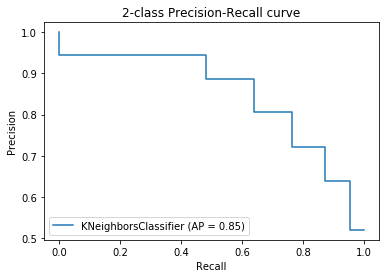

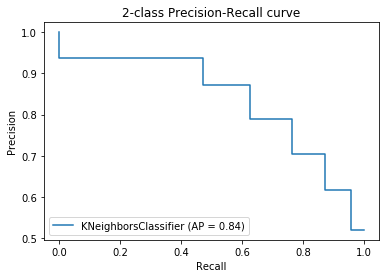

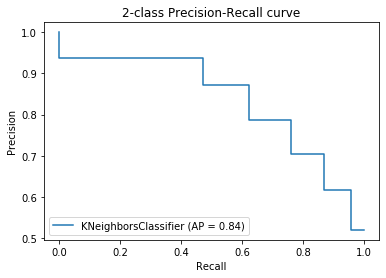

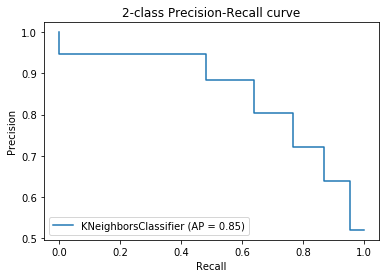

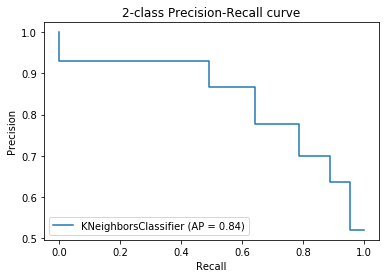

In [8]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [9]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result=pd.DataFrame(result)
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151


# Naive Bayes

In [11]:
clf_name='gnb'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = GaussianNB()

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k4 = 0.61 (+/- 0.11)
Score of L1 = 0.61 (+/- 0.13)
Score of Tree = 0.62 (+/- 0.12)


In [12]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

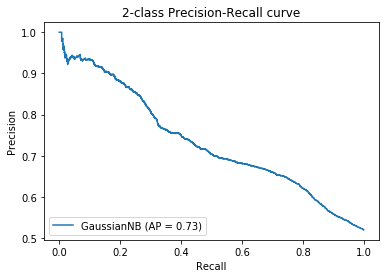

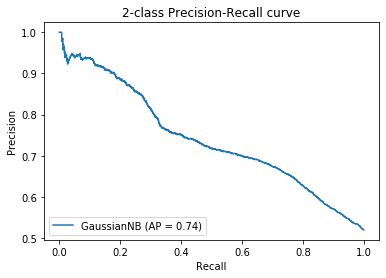

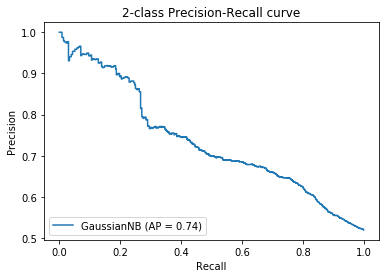

In [13]:
name = ['k4','L1','Tree']
model = [k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [14]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210


# Decision Tree

In [16]:
clf_name='dtree'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.59 (+/- 0.17)
Score of k5 = 0.57 (+/- 0.19)
Score of k4 = 0.57 (+/- 0.19)
Score of L1 = 0.59 (+/- 0.17)
Score of Tree = 0.57 (+/- 0.19)


In [17]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

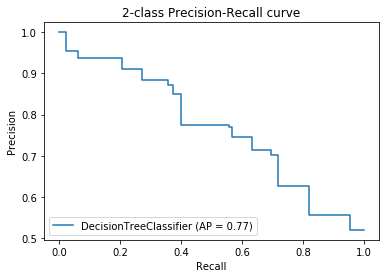

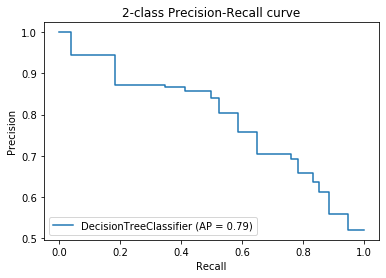

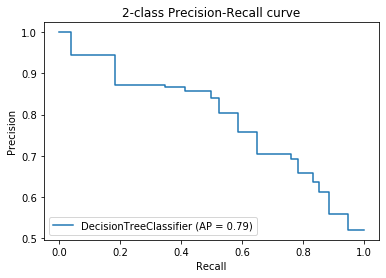

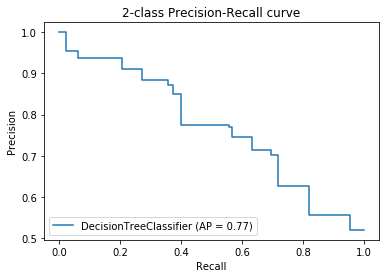

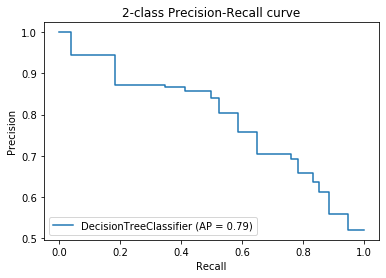

In [18]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [19]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
0,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
1,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095


# SVM

In [23]:
clf_name='SVM'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = svm.SVC(kernel='poly')

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.64 (+/- 0.08)
Score of k5 = 0.60 (+/- 0.13)
Score of k4 = 0.60 (+/- 0.13)
Score of L1 = 0.64 (+/- 0.08)
Score of Tree = 0.58 (+/- 0.16)


In [24]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

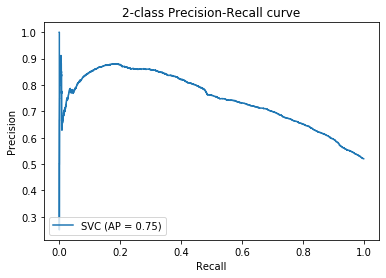

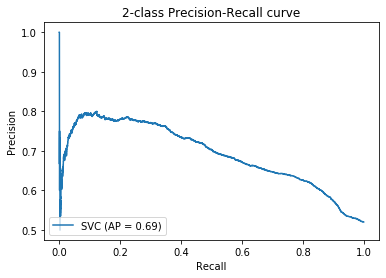

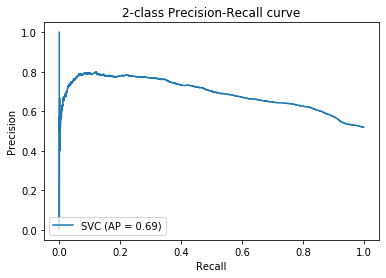

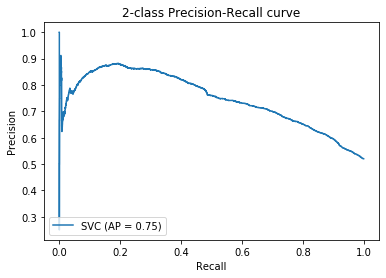

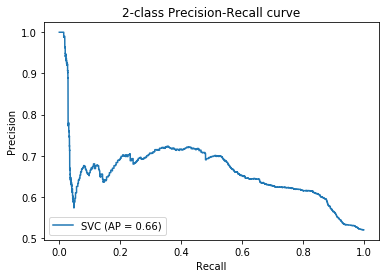

In [25]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [26]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
0,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
1,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095


## Neural Network 

In [27]:
clf_name='nn'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = MLPClassifier(activation='identity',solver='adam', max_iter=1000)

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.60 (+/- 0.13)
Score of k5 = 0.58 (+/- 0.13)
Score of k4 = 0.58 (+/- 0.13)
Score of L1 = 0.60 (+/- 0.14)
Score of Tree = 0.58 (+/- 0.14)


In [28]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

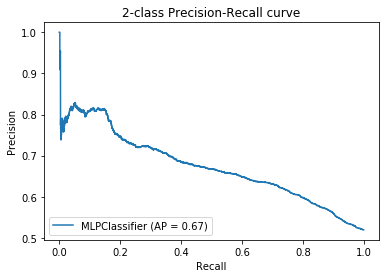

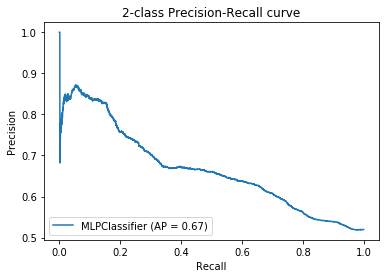

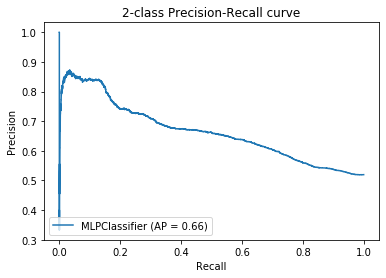

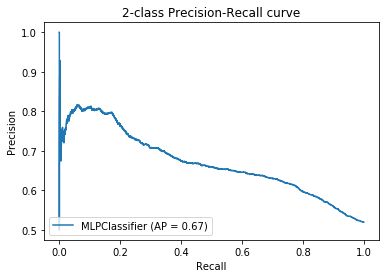

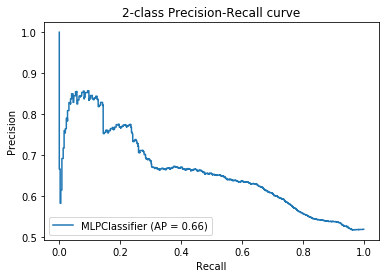

In [29]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [30]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
0,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
1,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095


# Logistic Regression

In [35]:
clf_name='lr'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = LogisticRegression(random_state=0)

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.60 (+/- 0.14)
Score of k5 = 0.58 (+/- 0.13)
Score of k4 = 0.58 (+/- 0.13)
Score of L1 = 0.60 (+/- 0.14)
Score of Tree = 0.58 (+/- 0.14)


In [36]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

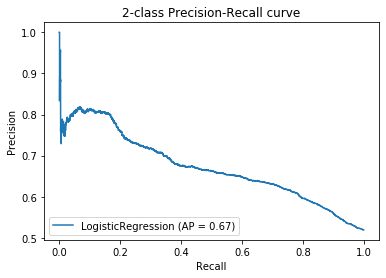

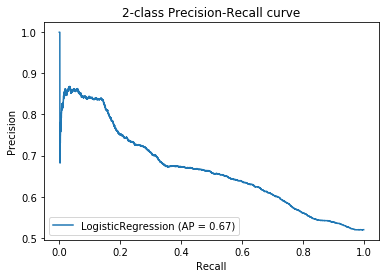

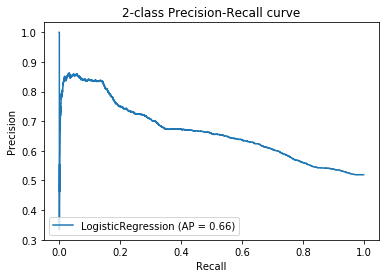

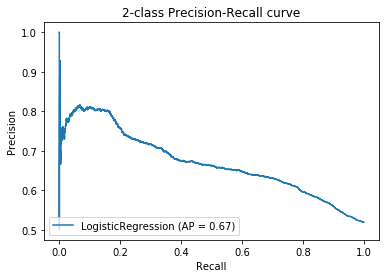

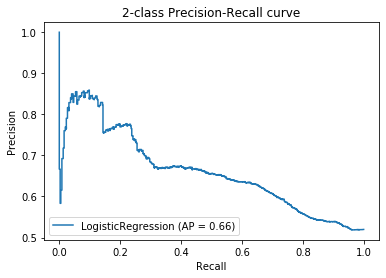

In [37]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [38]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
0,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
1,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095


# SGD

In [39]:
clf_name='sgd'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k6=np.array(data)[:,1:7].astype('float')
k5=np.array(data)[:,2:7].astype('float')
k4=np.array(data[['subjectivity_number','day','hour','minute']]).astype('float')
k3=np.array(data)[:,4:7].astype('float')
k2=np.array(data)[:,4:6].astype('float')
L1=np.array(data[['polarity_number','subjectivity_number','day','hour','minute']]).astype('float')
Tree=np.array(data[['subjectivity_number','day','hour']]).astype('float')
y=np.array(data)[:,7].astype('int')

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(clf, k6, y, cv=10)
scores_2 = cross_val_score(clf, k5, y, cv=10)
scores_3 = cross_val_score(clf, k4, y, cv=10)
scores_4 = cross_val_score(clf, k3, y, cv=10)
scores_5 = cross_val_score(clf, k2, y, cv=10)
scores_6 = cross_val_score(clf, L1, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k6','k5','k4','k3','k2','L1','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.60 (+/- 0.14)
Score of k5 = 0.58 (+/- 0.11)
Score of k4 = 0.58 (+/- 0.10)
Score of L1 = 0.60 (+/- 0.13)
Score of Tree = 0.58 (+/- 0.09)


In [40]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

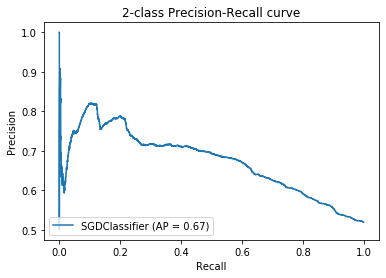

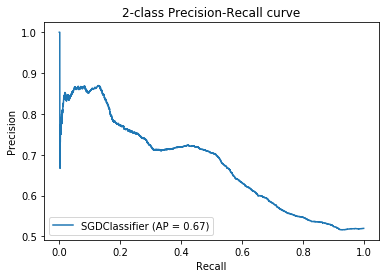

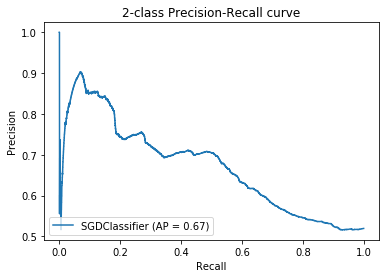

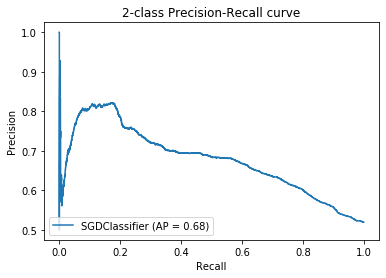

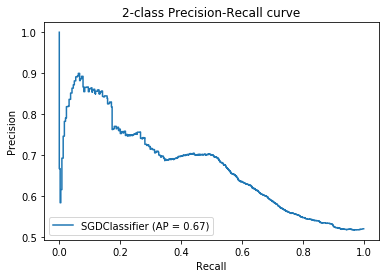

In [41]:
name = ['k6','k5','k4','L1','Tree']
model = [k6, k5, k4, L1, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [42]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
0,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
1,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
2,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
0,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
1,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095


In [10]:
clf_result = clf_result.reset_index()
clf_result = clf_result.drop(['index'],axis=1)
clf_result.to_csv('/Volumes/BECCA/Project/Data/Result/Russia/By_model/Total_Result.csv')

In [11]:
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k6,kNN,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,k5,kNN,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
2,k4,kNN,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
3,L1,kNN,4321,1051,4154,1307,0.782332,0.767768,0.804356,0.785636
4,Tree,kNN,4426,1278,3927,1202,0.771070,0.786425,0.775947,0.781151
5,k4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
6,L1,gnb,4133,2120,3085,1495,0.666297,0.734364,0.660963,0.695733
7,Tree,gnb,3897,2001,3204,1731,0.655497,0.692431,0.660732,0.676210
8,k6,dtree,3556,1211,3994,2072,0.696945,0.631841,0.745962,0.684175
9,k5,dtree,3303,811,4394,2325,0.710514,0.586887,0.802868,0.678095
